<font size=5>长回看时间测试</font>  
测试了不同length的RSI效果一般。也许需要人工构建均线组。

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('..')  # 文件位于

import factors  # 因子计算
import data_utils  # 数据读取
import performance as perf  # IC计算
import plotting  #绘图

In [2]:
dl = data_utils.DataLoader()
dl.init_month_df('E:/jupyternote/QF/CryptalC/data/UDST_M/15m_data')
# 计算未来收益率
data_utils.compute_future_rtn_for_all(dl)

In [3]:
import pandas as pd
import numpy as np

In [4]:
from pandas_ta.core import rsi

In [5]:
def cal_Z_score(factor_df, column_lists, span):
    '''Z-score'''
    for column_name in column_lists:
        mean_20 = factor_df[column_name].ewm(span, adjust=False).mean()
        std_20 = factor_df[column_name].ewm(30, adjust=False).std()  # todo 超参数搜索
        factor_df[f'{column_name}_Z'] = (factor_df[column_name].values - mean_20) / std_20
    return factor_df

@factors.handle_dataloader_data
def add_close_Z(raw_df:pd.DataFrame)-> pd.DataFrame:
    raw_df = cal_Z_score(raw_df, ['close'], 30)
    return raw_df

In [6]:
funcNames = ['skew', 'massi', 'ui', 'stochrsi', 'donchian', 'pvo', 'squeeze', 'amat', 'squeeze_pro', 'squeeze_pro']
factorNames = ['SKEW_30', 'MASSI_9_25', 'UI_14', 'STOCHRSIk_14_14_3_3', 'DCL_20_20', 'PVOh_12_26_9', 'SQZ_ON', 'AMATe_SR_8_21_2', 'SQZPRO_ON_NORMAL', 'SQZPRO_ON_NARROW']

In [7]:
def preprocess(df):
    df.drop('volume', axis=1, inplace=True)
    df.rename({'quote_volume':'volume'},axis=1, inplace=True)
#     df['volume'] = np.log(df['volume'] + 1)
    return df

@factors.handle_dataloader_data
def add_ta_factors(raw_df:pd.DataFrame, funcNames)-> pd.DataFrame:
    '''
    加入新因子的模板。
    :param raw_df: 原始数据
    :param core_indicators: 因子名称
    :return: 原始数据+因子
    '''
    raw_df = preprocess(raw_df)
    for indicator_name in funcNames:
        fun = getattr(raw_df.ta, indicator_name)
        temp_data = fun(append=True)
    raw_df['macd'] = raw_df.ta.macd()['MACD_12_26_9']
    raw_df['rsi'] = raw_df.ta.rsi()    
    return raw_df

In [8]:
add_ta_factors(dl, funcNames)

year: 2020


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.25it/s]


year: 2021


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:22<00:00,  1.92s/it]


year: 2022


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:13<00:14,  2.40s/it]

Exception: inputs are all NaN
Error: year: 2022, month:07, i:33


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:16<00:11,  2.38s/it]

Exception: inputs are all NaN
Error: year: 2022, month:08, i:33


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:26<00:02,  2.50s/it]

Exception: inputs are all NaN
Error: year: 2022, month:12, i:31


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:28<00:00,  2.42s/it]


year: 2023


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

Exception: inputs are all NaN
Error: year: 2023, month:01, i:32


  8%|██████▉                                                                            | 1/12 [00:02<00:31,  2.89s/it]

Exception: inputs are all NaN
Error: year: 2023, month:02, i:33


 17%|█████████████▊                                                                     | 2/12 [00:05<00:28,  2.89s/it]

Exception: inputs are all NaN
Error: year: 2023, month:03, i:34


 25%|████████████████████▊                                                              | 3/12 [00:08<00:26,  2.97s/it]

Exception: inputs are all NaN
Error: year: 2023, month:04, i:34


 33%|███████████████████████████▋                                                       | 4/12 [00:12<00:24,  3.06s/it]

Exception: inputs are all NaN
Error: year: 2023, month:05, i:35


 42%|██████████████████████████████████▌                                                | 5/12 [00:15<00:22,  3.20s/it]

Exception: inputs are all NaN
Error: year: 2023, month:06, i:36


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:18<00:19,  3.27s/it]

Exception: inputs are all NaN
Error: year: 2023, month:07, i:36


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:22<00:17,  3.47s/it]

Exception: inputs are all NaN
Error: year: 2023, month:08, i:40


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:27<00:15,  3.82s/it]

Exception: inputs are all NaN
Error: year: 2023, month:09, i:42


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:31<00:11,  3.89s/it]

Exception: inputs are all NaN
Error: year: 2023, month:10, i:43


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:35<00:00,  2.99s/it]


In [9]:
add_close_Z(dl)

year: 2020


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 38.64it/s]


year: 2021


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 17.24it/s]


year: 2022


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 14.74it/s]


year: 2023


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 13.48it/s]


In [10]:
from ml_performance import MLFactorEvaluator

In [11]:
from xgboost import XGBClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
record_names = [
    'baseline', 'ta_factors'
]
factor_names = [
    ['macd', 'rsi'],
    ['macd', 'rsi'] + factorNames,
]

In [14]:
xgb_best_params = {
    'max_depth': 4,
    'n_estimators': 30,
    'n_jobs': 4,
    'reg_lambda': 10,
    'subsample': 0.5,
    'gamma': 5
}

rf_best_params = {
    'max_depth': 4,
    'n_estimators': 30,
    'max_features': 'sqrt',
    'min_samples_leaf': 1000,
    'n_jobs': -1,
    'criterion': 'gini'
}

In [15]:
ml_evaluator = MLFactorEvaluator(
    method = RandomForestClassifier, 
    record_names = record_names, 
    factor_names = factor_names,
    params_dict = rf_best_params,
    cv = 5,
)

In [16]:
ml_evaluator.evaluate(dl, 'fwd_rtn_20_bool', subset_data=0.9)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.61s/it]


In [17]:
ml_record = ml_evaluator.get_assess_df('f1')

In [18]:
plotting.plot_ML_table(ml_record)

Machine Learning records


,0,1,2,3,4,mean,std
baseline,0.6315,0.5983,0.6046,0.5846,0.6236,0.6085,0.0190
ta_factors,0.6317,0.5982,0.6046,0.5846,0.6235,0.6085,0.0191


Machine Learning T-test Analysis


,t_ind,p_ind,t_rel,p_rel
record_name,,,,
ta_factors,-0.0018,0.9986,-0.3634,0.7347


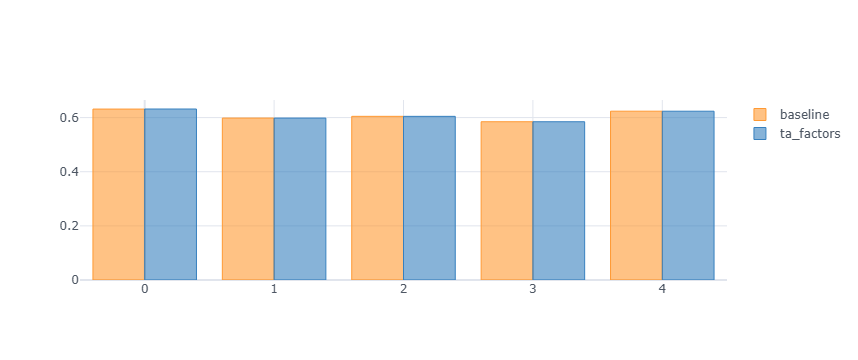

In [19]:
plotting.plot_ML_records(ml_record)

## 详细观察为什么RSI效果会好

In [20]:
months = ['01', '02','03','04','05','06','07','08','09']
train_df_list = []
for m in months:
    train_df_list += dl.get_month_df('2022', m)
    
test_months = ['10', '11', '12']
test_df_list = []
for m in test_months:
    test_df_list += dl.get_month_df('2022', m)

In [21]:
train_df = pd.concat(train_df_list).dropna()
test_df = pd.concat(test_df_list).dropna()

In [22]:
y_col = 'fwd_rtn_20_bool'
y_train = train_df[y_col]
y_test = test_df[y_col]

## RSI 模型

In [23]:
from sklearn.metrics import f1_score, auc, confusion_matrix, roc_curve

In [24]:
X_cols = ['rsi', 'macd']
x_train = train_df[X_cols]
x_test = test_df[X_cols]

In [25]:
model_rsi = RandomForestClassifier(**rf_best_params)
# model_rsi = XGBClassifier(**xgb_best_params)
# 模型训练
model_rsi.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=1000, n_estimators=30,
                       n_jobs=-1)

In [26]:
Y_pred_rsi = model_rsi.predict(x_test)
Y_pred_rsi_proba = model_rsi.predict_proba(x_test)

## RC均线组 模型

In [27]:
X_cols = ['macd'] + ['UI_14', 'AMATe_SR_8_21_2' ]
x_train = train_df[X_cols]
x_test = test_df[X_cols]

In [28]:
model_ewm = RandomForestClassifier(**rf_best_params)
# model_ewm = XGBClassifier(**xgb_best_params)
# 模型训练
model_ewm.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=1000, n_estimators=30,
                       n_jobs=-1)

In [29]:
Y_pred_ewm = model_ewm.predict(x_test)
Y_pred_ewm_proba = model_ewm.predict_proba(x_test)

In [30]:
# 全特征   RF min_samples_leaf 1000
print('f1(ewm): ', f1_score(y_test, Y_pred_ewm))
print('f1(rsi): ', f1_score(y_test, Y_pred_rsi))
fpr, tpr, thresholds = roc_curve(y_test.astype(int).values, Y_pred_ewm_proba[:,1])
print('auc(ewm): ', auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test.astype(int).values, Y_pred_rsi_proba[:,1])
print('auc(rsi): ', auc(fpr, tpr))
print('cm(ewm):\n ', confusion_matrix(y_test, Y_pred_ewm))
print('cm(rsi):\n ', confusion_matrix(y_test, Y_pred_rsi))

f1(ewm):  0.5590795816109819
f1(rsi):  0.591729199569223
auc(ewm):  0.5607704998915359
auc(rsi):  0.5710609836006936
cm(ewm):
  [[155713 160859]
 [121700 179140]]
cm(rsi):
  [[129656 186916]
 [ 95894 204946]]


In [31]:
model_ewm.feature_names_in_

array(['macd', 'UI_14', 'AMATe_SR_8_21_2'], dtype=object)

In [32]:
model_ewm.feature_importances_

array([0.34815579, 0.25385898, 0.39798524])

## 训练集结果

In [34]:
X_cols = ['rsi', 'macd']
x_train = train_df[X_cols]
x_test = test_df[X_cols]

In [35]:
Y_pred_rsi_train = model_rsi.predict(x_train)
Y_pred_rsi_proba_train = model_rsi.predict_proba(x_train)

In [36]:
X_cols = ['macd'] + ['UI_14', 'AMATe_SR_8_21_2' ]
x_train = train_df[X_cols]
x_test = test_df[X_cols]

In [37]:
Y_pred_ewm_train = model_ewm.predict(x_train)
Y_pred_ewm_proba_train = model_ewm.predict_proba(x_train)

In [38]:
# ['RSI_14', 'pair_8_32', 'PGO_14', 'pair_16_64', 'pair_32_128', 'pair_64_256', 'PVOs_12_26_9']
print('f1(ewm): ', f1_score(y_train, Y_pred_ewm_train))
print('f1(rsi): ', f1_score(y_train, Y_pred_rsi_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(int).values, Y_pred_ewm_proba_train[:,1])
print('auc(ewm): ', auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_train.astype(int).values, Y_pred_rsi_proba_train[:,1])
print('auc(rsi): ', auc(fpr, tpr))
print('cm(ewm):\n ', confusion_matrix(y_train, Y_pred_ewm_train))
print('cm(rsi):\n ', confusion_matrix(y_train, Y_pred_rsi_train))

f1(ewm):  0.5812187486412452
f1(rsi):  0.5932828512739614
auc(ewm):  0.5645733928816754
auc(rsi):  0.5703709222944664
cm(ewm):
  [[394195 454195]
 [316329 534698]]
cm(rsi):
  [[381463 466927]
 [295180 555847]]
